In [1]:
import json
import os
import glob
import pprint
from tqdm import tqdm
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("datasets/verified.dat")

In [37]:
# df = df[df['friends_count'] <= 1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384494 entries, 0 to 384493
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   #ID              384494 non-null  int64 
 1   ScreenName       384493 non-null  object
 2   Protected        384494 non-null  bool  
 3   Verified         384494 non-null  bool  
 4   FriendsCount     384494 non-null  int64 
 5   FollowersCount   384494 non-null  int64 
 6   ListedCount      384494 non-null  int64 
 7   StatusesCount    384494 non-null  int64 
 8   CreatedAt        384494 non-null  object
 9   URL              384465 non-null  object
 10  ProfileImageURL  384485 non-null  object
 11  Location         311171 non-null  object
 12  Relation         384494 non-null  object
 13  Subject          384494 non-null  object
dtypes: bool(2), int64(5), object(7)
memory usage: 35.9+ MB


In [38]:
df.head()

,#ID,ScreenName,Protected,Verified,FriendsCount,FollowersCount,ListedCount,StatusesCount,CreatedAt,URL,ProfileImageURL,Location,Relation,Subject
0,490843992,ruaridh_langan,False,True,668,759,4,953,Sun Feb 12 23:51:19 +0000 2012,NaN,http://pbs.twimg.com/profile_images/1439567595...,"Scotland, United Kingdom",friends,verified
1,2216668776,janelle_cpp,False,True,3486,2536,29,17464,Tue Nov 26 22:43:08 +0000 2013,https://t.co/282UrLP38b,http://pbs.twimg.com/profile_images/1427197677...,stolen patwin/yokut land,friends,verified
2,363373418,archiliciouz,False,True,753,5558,22,8732,Sun Aug 28 00:12:47 +0000 2011,https://t.co/qOXXAaoxIN,http://pbs.twimg.com/profile_images/1426328390...,"Ukraine, Kyiv",friends,verified
3,3356306397,JakobLazzaro,False,True,261,269,13,2458,Fri Jul 03 06:40:34 +0000 2015,https://t.co/pbC2S0oXDU,http://pbs.twimg.com/profile_images/1181214533...,"South Bend, IN",friends,verified
4,208046707,ArifAltunkaynak,False,True,455,2671,10,4325,Tue Oct 26 14:41:19 +0000 2010,https://t.co/4OOrdBj3gv,http://pbs.twimg.com/profile_images/3788000004...,"Nusaybin, Türkiye",friends,verified


In [5]:
# df[df['FriendsCount'] < 5000].info()

### Dict structure    
uid:{
    
    uid: 123,
    name: '',
    friends_count: 0,
    followers_count: 0,
    listed_count: 0,
    statuses_count: 0,
    pf_fake: 0,
    pf_real: 0,
    gc_fake: 0,
    gc_real: 0,
    description: '',
    tweets: []

}

In [6]:
ids = list(df['#ID'])

In [17]:
users = {}

for i in ids:
    
    users[i] = {
        'uid': i,
        'pf_fake': 0,
        'pf_real': 0,
        'gc_fake': 0,
        'gc_real': 0,
        'description': '',
        'tweets': []
    }

In [18]:
len(users)

384494

In [19]:
user_dict = users

In [20]:
dataset_path = "../FakeNewsNet/code/fakenewsnet_dataset"

## PolitiFact

### Fake Tweets & Retweets

In [21]:
files = glob.iglob(f"../FakeNewsNet/code/fakenewsnet_dataset/politifact/fake/*/tweets/*.json")

# Expected number of files ~ 143000

for file in tqdm(files):
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in user_dict:
            user_dict[user_id]['pf_fake']+=1
            user_dict[user_id]['description'] = des
            user_dict[user_id]['tweets'].append(tweet)

113868it [11:42, 162.07it/s]


In [22]:
files_rt = glob.iglob(f"../FakeNewsNet/code/fakenewsnet_dataset/politifact/fake/*/retweets/*.json")

# Expected number of files ~ 2400

for file in tqdm(files_rt):
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in user_dict:
                user_dict[user_id]['pf_fake']+=1
                user_dict[user_id]['description'] = des
                user_dict[user_id]['tweets'].append(tweet)

2700it [00:03, 741.00it/s]


### Real Tweets & Retweets

In [23]:
files = glob.iglob(f"../FakeNewsNet/code/fakenewsnet_dataset/politifact/real/*/tweets/*.json")

# Expected number of files ~ 362000

for file in tqdm(files):
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in user_dict:
            user_dict[user_id]['pf_real']+=1
            user_dict[user_id]['description'] = des
            user_dict[user_id]['tweets'].append(tweet)
            

310135it [29:39, 174.25it/s]


In [24]:
files_rt = glob.iglob(f"../FakeNewsNet/code/fakenewsnet_dataset/politifact/real/*/retweets/*.json")

# Expected number of files ~ 0

for file in tqdm(files_rt):
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in user_dict:
                user_dict[user_id]['pf_real']+=1
                user_dict[user_id]['description'] = des
                user_dict[user_id]['tweets'].append(tweet)

0it [00:00, ?it/s]


## GossipCop

### Fake Tweets & Retweets

In [25]:
files = glob.iglob(f"../FakeNewsNet/code/fakenewsnet_dataset/gossipcop/fake/*/tweets/*.json")

# Expected number of files ~ 524000

for file in tqdm(files):
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in user_dict:
            user_dict[user_id]['gc_fake']+=1
            user_dict[user_id]['description'] = des
            user_dict[user_id]['tweets'].append(tweet)
            

452352it [43:03, 175.08it/s]


In [27]:
files_rt = glob.iglob(f"../FakeNewsNet/code/fakenewsnet_dataset/gossipcop/fake/*/retweets/*.json")

# Expected number of files ~ 0

for file in tqdm(files_rt):
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in user_dict:
                user_dict[user_id]['gc_fake']+=1
                user_dict[user_id]['description'] = des
                user_dict[user_id]['tweets'].append(tweet)


0it [00:00, ?it/s]


### Real Tweets & Retweets

In [28]:
files = glob.iglob(f"../FakeNewsNet/code/fakenewsnet_dataset/gossipcop/real/*/tweets/*.json")

# Expected number of files ~ 815000

for file in tqdm(files):
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in user_dict:
            user_dict[user_id]['gc_real']+=1
            user_dict[user_id]['description'] = des
            user_dict[user_id]['tweets'].append(tweet)


755975it [1:09:45, 180.62it/s]


In [29]:
files = glob.iglob(f"../FakeNewsNet/code/fakenewsnet_dataset/gossipcop/real/*/retweets/*.json")

# Expected number of files ~ 

for file in tqdm(files):
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']
        
    
            if user_id in user_dict:
                user_dict[user_id]['gc_real']+=1
                user_dict[user_id]['description'] = des
                user_dict[user_id]['tweets'].append(tweet)

0it [00:00, ?it/s]


## Create Dataset

In [30]:
list_of_lists = []

for user_id in user_dict:
    gc_fake = user_dict[user_id]['gc_fake']
    gc_real = user_dict[user_id]['gc_real']
    pf_fake = user_dict[user_id]['pf_fake']
    pf_real = user_dict[user_id]['pf_real']
    des = user_dict[user_id]['description']
    tweets = "^".join(user_dict[user_id]['tweets'])
    
    list_of_lists.append([user_id, pf_fake, pf_real, gc_fake, gc_real, des, tweets])


In [31]:
df_tw = pd.DataFrame(list_of_lists, columns=["uid", 'pf_fake','pf_real','gc_fake','gc_real', 'description', 'tweets'])

In [32]:
df_tw.head()

,uid,pf_fake,pf_real,gc_fake,gc_real,description,tweets
0,490843992,0,0,0,0,,
1,2216668776,0,0,0,0,,
2,363373418,0,0,0,0,,
3,3356306397,0,0,0,0,,
4,208046707,0,0,0,0,,


Drop useless columns

In [44]:
df.drop(['Protected', 'CreatedAt', 'URL', 'ProfileImageURL', 'Location', 'Subject', 'Relation', 'Verified'], axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384494 entries, 0 to 384493
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   #ID             384494 non-null  int64 
 1   ScreenName      384493 non-null  object
 2   FriendsCount    384494 non-null  int64 
 3   FollowersCount  384494 non-null  int64 
 4   ListedCount     384494 non-null  int64 
 5   StatusesCount   384494 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 17.6+ MB


In [41]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384494 entries, 0 to 384493
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uid          384494 non-null  int64 
 1   pf_fake      384494 non-null  int64 
 2   pf_real      384494 non-null  int64 
 3   gc_fake      384494 non-null  int64 
 4   gc_real      384494 non-null  int64 
 5   description  384494 non-null  object
 6   tweets       384494 non-null  object
dtypes: int64(5), object(2)
memory usage: 20.5+ MB


In [46]:
df_feat = df.merge(df_tw, how='inner', left_on='#ID', right_on='uid')

In [47]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384494 entries, 0 to 384493
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   #ID             384494 non-null  int64 
 1   ScreenName      384493 non-null  object
 2   FriendsCount    384494 non-null  int64 
 3   FollowersCount  384494 non-null  int64 
 4   ListedCount     384494 non-null  int64 
 5   StatusesCount   384494 non-null  int64 
 6   uid             384494 non-null  int64 
 7   pf_fake         384494 non-null  int64 
 8   pf_real         384494 non-null  int64 
 9   gc_fake         384494 non-null  int64 
 10  gc_real         384494 non-null  int64 
 11  description     384494 non-null  object
 12  tweets          384494 non-null  object
dtypes: int64(10), object(3)
memory usage: 41.1+ MB


In [48]:
df_feat.head()

,#ID,ScreenName,FriendsCount,FollowersCount,ListedCount,StatusesCount,uid,pf_fake,pf_real,gc_fake,gc_real,description,tweets
0,490843992,ruaridh_langan,668,759,4,953,490843992,0,0,0,0,,
1,2216668776,janelle_cpp,3486,2536,29,17464,2216668776,0,0,0,0,,
2,363373418,archiliciouz,753,5558,22,8732,363373418,0,0,0,0,,
3,3356306397,JakobLazzaro,261,269,13,2458,3356306397,0,0,0,0,,
4,208046707,ArifAltunkaynak,455,2671,10,4325,208046707,0,0,0,0,,


In [49]:
df_feat['total_fake'] = df_feat['pf_fake'] + df_feat['gc_fake']
df_feat['total_real'] = df_feat['pf_real'] + df_feat['gc_real']

df_feat['net_trust'] = df_feat['total_real'] - df_feat['total_fake']

df_feat['total_news'] = df_feat['total_real'] + df_feat['total_fake']
df_feat['fake_prob'] = df_feat['total_fake'] / df_feat['total_news']

df_feat['net_trust_norm'] = df_feat['net_trust']/df_feat['total_news']

In [50]:
df_feat['fake'] = [1 if x >= 0.5 else 0 if x < 0.5 else 2 for x in df_feat['fake_prob']]

In [51]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384494 entries, 0 to 384493
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   #ID             384494 non-null  int64  
 1   ScreenName      384493 non-null  object 
 2   FriendsCount    384494 non-null  int64  
 3   FollowersCount  384494 non-null  int64  
 4   ListedCount     384494 non-null  int64  
 5   StatusesCount   384494 non-null  int64  
 6   uid             384494 non-null  int64  
 7   pf_fake         384494 non-null  int64  
 8   pf_real         384494 non-null  int64  
 9   gc_fake         384494 non-null  int64  
 10  gc_real         384494 non-null  int64  
 11  description     384494 non-null  object 
 12  tweets          384494 non-null  object 
 13  total_fake      384494 non-null  int64  
 14  total_real      384494 non-null  int64  
 15  net_trust       384494 non-null  int64  
 16  total_news      384494 non-null  int64  
 17  fake_prob 

In [62]:
# df_feat.to_csv('datasets/verified_features_300k.csv', index=False)

In [38]:
# df_feat = pd.read_csv("datasets/verified_features_300k.csv")

In [54]:
df_final = df_feat[
     (df_feat['ScreenName'] != 'GossipCop') & (df_feat['ScreenName'] != 'PolitiFact')
#      & (df_feat['net_trust_norm'] != 0)
     & (df_feat['FriendsCount'] <= 10000)
     & (df_feat['total_fake'] > 0)
     & (df_feat['total_real'] > 0)


    ].sort_values(['total_news', 'net_trust_norm', 'net_trust', 'FollowersCount'], ascending=False)

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 358546 to 152790
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #ID             2882 non-null   int64  
 1   ScreenName      2882 non-null   object 
 2   FriendsCount    2882 non-null   int64  
 3   FollowersCount  2882 non-null   int64  
 4   ListedCount     2882 non-null   int64  
 5   StatusesCount   2882 non-null   int64  
 6   uid             2882 non-null   int64  
 7   pf_fake         2882 non-null   int64  
 8   pf_real         2882 non-null   int64  
 9   gc_fake         2882 non-null   int64  
 10  gc_real         2882 non-null   int64  
 11  description     2882 non-null   object 
 12  tweets          2882 non-null   object 
 13  total_fake      2882 non-null   int64  
 14  total_real      2882 non-null   int64  
 15  net_trust       2882 non-null   int64  
 16  total_news      2882 non-null   int64  
 17  fake_prob       2882 non-n

In [56]:
df_final['fake'] = [1 if x >= 0.5 else 0 if x < 0.5 else 2 for x in df_final['fake_prob']]

In [57]:
df_final.to_csv('datasets/verified_features_3k.csv', index=False)

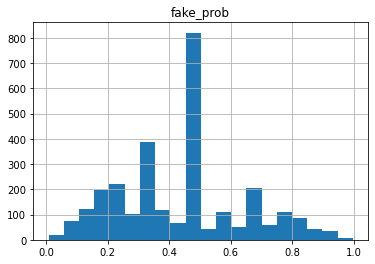

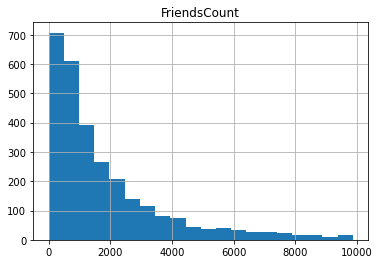

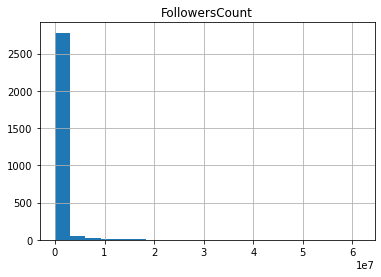

In [58]:
df_final.hist(column='fake_prob', bins=20)
df_final.hist(column='FriendsCount', bins=20)
df_final.hist(column='FollowersCount', bins=20)

plt.show()

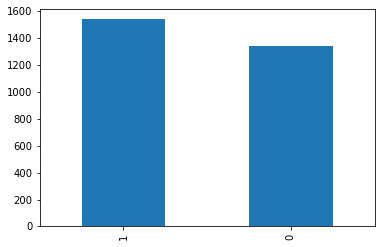

In [59]:
df_final["fake"].value_counts().plot.bar()
plt.show()

In [60]:
df_final["fake"].value_counts()

1    1539
0    1343
Name: fake, dtype: int64

In [62]:
dat = pd.read_csv("datasets/verified.dat")

In [63]:
filtered = dat[dat['#ID'].isin(list(df_final['#ID']))]
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 769 to 384480
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #ID              2882 non-null   int64 
 1   ScreenName       2882 non-null   object
 2   Protected        2882 non-null   bool  
 3   Verified         2882 non-null   bool  
 4   FriendsCount     2882 non-null   int64 
 5   FollowersCount   2882 non-null   int64 
 6   ListedCount      2882 non-null   int64 
 7   StatusesCount    2882 non-null   int64 
 8   CreatedAt        2882 non-null   object
 9   URL              2882 non-null   object
 10  ProfileImageURL  2882 non-null   object
 11  Location         2620 non-null   object
 12  Relation         2882 non-null   object
 13  Subject          2882 non-null   object
dtypes: bool(2), int64(5), object(7)
memory usage: 298.3+ KB


In [64]:
# filtered.to_csv('datasets/verified_3k.dat', index = False)